In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer

from wordcloud import WordCloud, STOPWORDS
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /home/lenovo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lenovo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
data = pd.read_csv("Industry_data.csv",
                  names = ['Date','Country','Local','Industry_sector',
                            'Accident_Level','Potential_Accident_Level',
                            'Gender','Employee_Third_Party','Critical_Risk',
                            'Description'],skiprows=1)

In [32]:
data.head()

,Date,Country,Local,Industry_sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Third_Party,Critical_Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [33]:
data.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry_sector             0
Accident_Level              0
Potential_Accident_Level    0
Gender                      0
Employee_Third_Party        0
Critical_Risk               0
Description                 0
dtype: int64

In [34]:
data.shape

(425, 10)

### Indusrt safety data has 425 rows and 10 columns.
### Dataset does not have any null values

In [35]:
data['Date'] = pd. to_datetime(data['Date'],format='%Y%m%d %H:%M:%S')

In [36]:
data.dtypes

Date                        datetime64[ns]
Country                             object
Local                               object
Industry_sector                     object
Accident_Level                      object
Potential_Accident_Level            object
Gender                              object
Employee_Third_Party                object
Critical_Risk                       object
Description                         object
dtype: object

In [37]:
data['Year'] = data['Date'].apply(lambda x: x.year)
data['Month'] = data['Date'].apply(lambda x : x.month)
data['Day'] = data['Date'].apply(lambda x: x.day)
data['Weekday'] = data['Date'].apply(lambda x : x.day_name())


In [38]:
def assign_seasons(month):
    if month in [9,10,11]:
        season = 'Spring'
    elif month in [1,2,12]:
        season = 'Summer'
    elif month in [3,4,5]:
        season = 'Autumn'
    elif month in[6,7,8]:
        season = 'Winter'
    return season

In [39]:
data['Season'] = data['Month'].apply(assign_seasons)
data.head()

,Date,Country,Local,Industry_sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Third_Party,Critical_Risk,Description,Year,Month,Day,Weekday,Season
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,Summer
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,Summer
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,Summer
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,Summer
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,Summer


In [40]:
data[['Season']].value_counts()

Season
Autumn    146
Summer    125
Winter     96
Spring     58
dtype: int64

In [41]:
fig = px.pie(data, names='Season', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

In [42]:
import holidays

In [43]:
brazil_holidays = []
for date in holidays.Brazil(years = 2016).items():
    brazil_holidays.append(str(date[0]))    
for date in holidays.Brazil(years = 2017).items():
    brazil_holidays.append(str(date[0]))    
brazil_holidays

['2016-01-01',
 '2016-04-21',
 '2016-05-01',
 '2016-09-07',
 '2016-10-12',
 '2016-11-02',
 '2016-11-15',
 '2016-12-25',
 '2016-03-25',
 '2016-03-27',
 '2016-05-26',
 '2016-02-10',
 '2016-02-09',
 '2017-01-01',
 '2017-04-21',
 '2017-05-01',
 '2017-09-07',
 '2017-10-12',
 '2017-11-02',
 '2017-11-15',
 '2017-12-25',
 '2017-04-14',
 '2017-04-16',
 '2017-06-15',
 '2017-03-01',
 '2017-02-28']

In [44]:
data['isHoliday'] = [1 if str(val).split()[0] in brazil_holidays 
                     else 0 for val in data['Date']]
data.head(3)

,Date,Country,Local,Industry_sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Third_Party,Critical_Risk,Description,Year,Month,Day,Weekday,Season,isHoliday
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,Summer,1
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,Summer,0
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,Summer,0


In [46]:
data['isHoliday'].value_counts()

0    415
1     10
Name: isHoliday, dtype: int64

In [16]:
data['Country'].value_counts()

Country_01    251
Country_02    130
Country_03     44
Name: Country, dtype: int64

<AxesSubplot:ylabel='Country'>

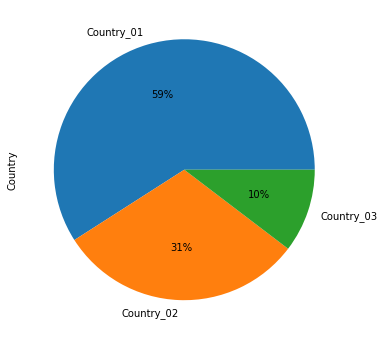

In [17]:
data['Country'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', 
                                           labels = ['Country_01', 'Country_02', 'Country_03'], figsize = (10, 6))

<AxesSubplot:>

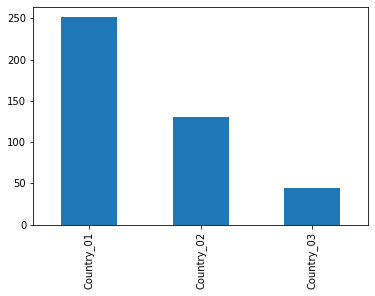

In [18]:
data['Country'].value_counts().plot(kind='bar')

<AxesSubplot:>

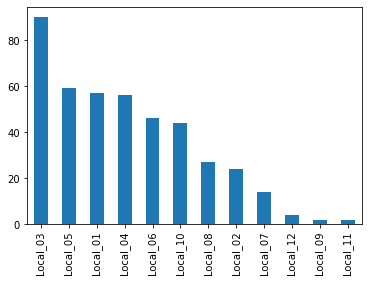

In [19]:
data['Local'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Industry_sector'>

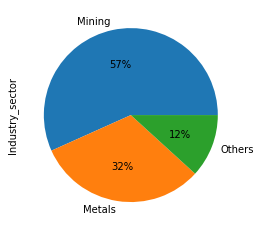

In [20]:
data['Industry_sector'].value_counts().plot(kind='pie',autopct = '%.0f%%')

### Mining industry sector has larger number of accidents 
### Most of the accidents happened on working days. Few accidents are observed on holidays as well.
### Autumn and Summer seasons have more accidents compared to other seasons.
### Country_01 has 59 % of accidents.

In [21]:
acc_percentages =(data['Accident_Level'].value_counts()/data.shape[0])*100
acc_levels = data['Accident_Level'].unique()
potacc_percentages = (data['Potential_Accident_Level'].value_counts()/data.shape[0])*100

accident_levels_df = pd.concat([acc_percentages,potacc_percentages], axis = 1).fillna(0)
accident_levels_df
#accident_levels_df = pd.melt(accident_levels_df.reset_index(), ['index']).rename(columns={'index':'Severity', 'variable':'Levels'})

,Accident_Level,Potential_Accident_Level
I,74.352941,11.529412
II,9.411765,22.352941
III,7.294118,24.941176
IV,7.058824,33.647059
V,1.882353,7.294118
VI,0.000000,0.235294


In [22]:
#accident_levels_df.drop('level_0',axis=1,inplace = True)
accident_levels_df.reset_index(inplace = True)
accident_levels_df

,index,Accident_Level,Potential_Accident_Level
0,I,74.352941,11.529412
1,II,9.411765,22.352941
2,III,7.294118,24.941176
3,IV,7.058824,33.647059
4,V,1.882353,7.294118
5,VI,0.000000,0.235294


<AxesSubplot:>

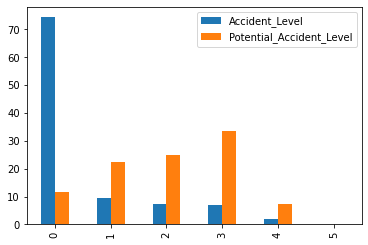

In [23]:
accident_levels_df.plot(kind='bar')

In [24]:
data['Gender'].value_counts()

Male      403
Female     22
Name: Gender, dtype: int64

### 74 % accidents are with accident level I
### Males have more number of accidents compared to females
### More number of accidents with Level IV in potential accident level
### For employee types employee and third party have highest numbers than third party remote type
### Under mining industry sector there are more number of accidents for male employees
### Critical risk under the others category has highest count

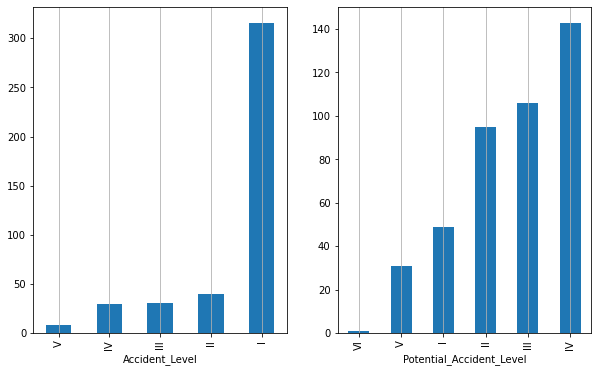

In [25]:
fig,ax = plt.subplots(1,2,figsize=(10,6))

data['Accident_Level'].reset_index().groupby('Accident_Level').count().sort_values(by= 
       "index").plot(kind="bar", legend=False, 
        ax=ax[0]).grid(axis='x')

pot_acc_level = data['Potential_Accident_Level'].reset_index().groupby('Potential_Accident_Level').count().sort_values(by= 
       "index")
pot_acc_level.plot(kind="bar", legend=False, 
        ax=ax[1]).grid(axis='x')


plt.show()

<AxesSubplot:ylabel='Employee_Third_Party'>

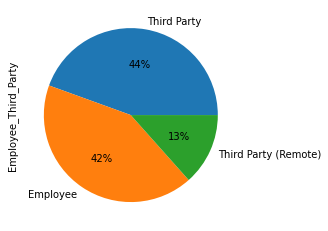

In [26]:
data['Employee_Third_Party'].value_counts().plot(kind = 'pie',autopct = '%.0f%%')

<AxesSubplot:ylabel='Gender'>

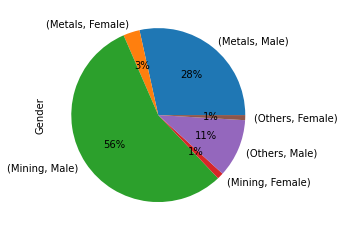

In [27]:
data.groupby('Industry_sector')['Gender'].value_counts().plot(kind = 'pie',autopct = '%.0f%%')

<AxesSubplot:xlabel='Industry_sector,Gender'>

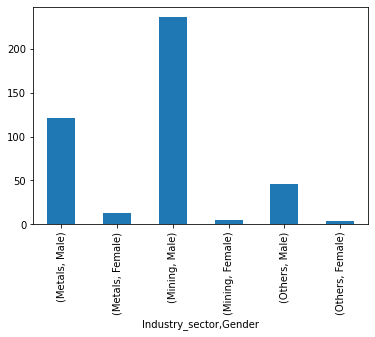

In [28]:
data.groupby('Industry_sector')['Gender'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

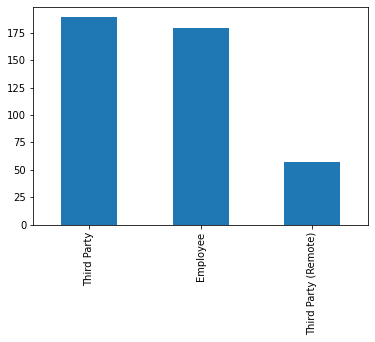

In [29]:
data['Employee_Third_Party'].value_counts().plot(kind = 'bar')

In [30]:
cri_risk = data['Critical_Risk'].value_counts().sort_values(ascending = False).index
cri_risk

Index(['Others', 'Pressed', 'Manual Tools', 'Chemical substances',
       'Venomous Animals', 'Cut', 'Projection', 'Bees', 'Fall',
       'Vehicles and Mobile Equipment', 'Fall prevention (same level)',
       'remains of choco', 'Pressurized Systems', 'Fall prevention',
       'Suspended Loads', 'Power lock', 'Liquid Metal',
       'Pressurized Systems / Chemical Substances',
       'Blocking and isolation of energies', 'Projection of fragments',
       'Machine Protection', 'Electrical Shock',
       'Individual protection equipment', 'Projection/Manual Tools', 'Burn',
       'Poll', 'Projection/Choco', 'Projection/Burning', 'Plates',
       'Confined space', 'Traffic', '\nNot applicable',
       'Electrical installation'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Pressed'),
  Text(2, 0, 'Manual Tools'),
  Text(3, 0, 'Chemical substances'),
  Text(4, 0, 'Venomous Animals'),
  Text(5, 0, 'Cut'),
  Text(6, 0, 'Projection'),
  Text(7, 0, 'Bees'),
  Text(8, 0, 'Fall'),
  Text(9, 0, 'Vehicles and Mobile Equipment'),
  Text(10, 0, 'Fall prevention (same level)'),
  Text(11, 0, 'remains of choco'),
  Text(12, 0, 'Pressurized Systems'),
  Text(13, 0, 'Fall prevention'),
  Text(14, 0, 'Suspended Loads'),
  Text(15, 0, 'Power lock'),
  Text(16, 0, 'Liquid Metal'),
  Text(17, 0, 'Pressurized Systems / Chemical Substances'),
  Text(18, 0, 'Blocking and isolation of energies'),
  Text(19, 0, 'Projection of fragments'),
  Text(20, 0, 'Machine Protection'),
  Text(21, 0, 'Electrical Shock'),
  Text(22, 0, 'Individual protection equipment'),
  Text(23, 0, 'Projection/Manual To

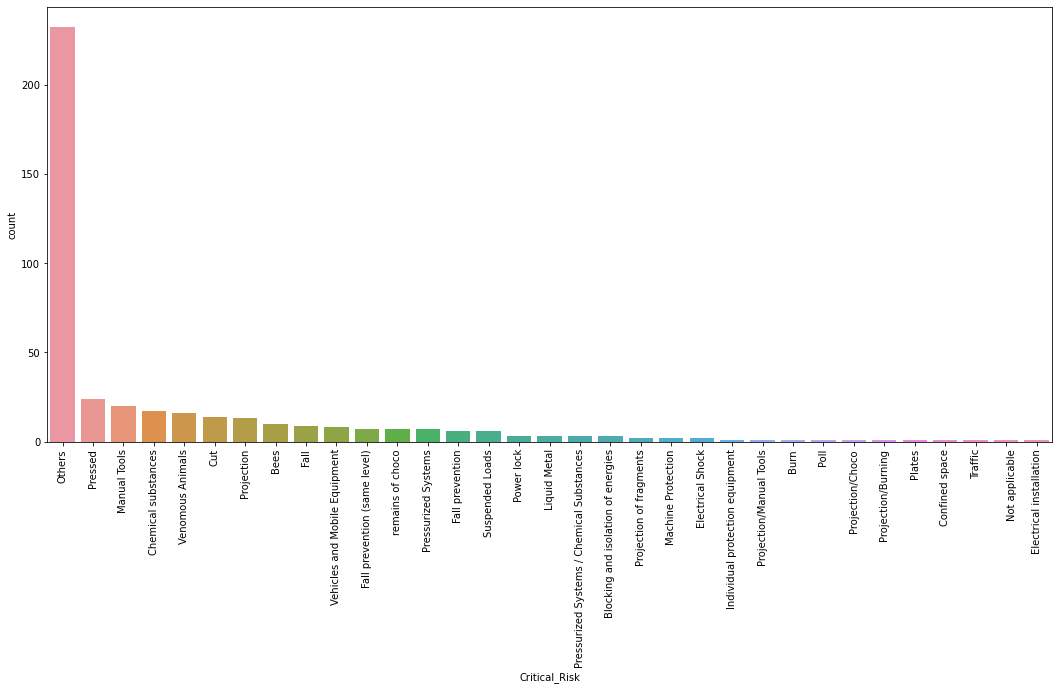

In [31]:
plt.figure(figsize=(18,8))
sns.countplot(x = data['Critical_Risk'], order = cri_risk)
plt.xticks(rotation = 90)

In [32]:
columns = ['Gender','Country','Employee_Third_Party','Industry_sector','Season','Month']

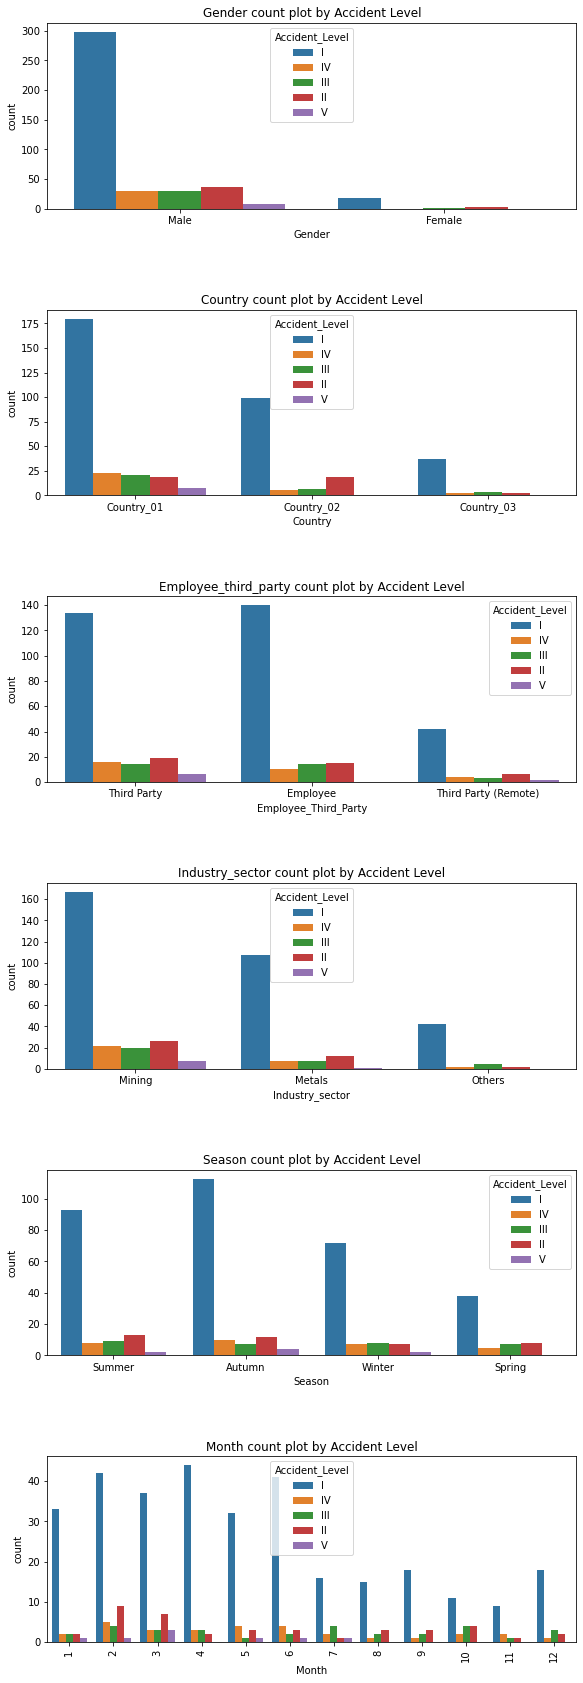

In [33]:
i = 0

fig,axs = plt.subplots(6,1,figsize=(10,25))
fig.tight_layout(pad=8.0)
plt.xticks(rotation = 90)
for col in columns:
    labels = data[col].value_counts().index
    axs[i] = sns.countplot(x = col, data = data, ax = axs[i], orient = 'v',
                  hue = 'Accident_Level').set_title(col.capitalize() +' count plot by Accident Level',fontsize=12)
    
    i = i+1
    
plt.show()


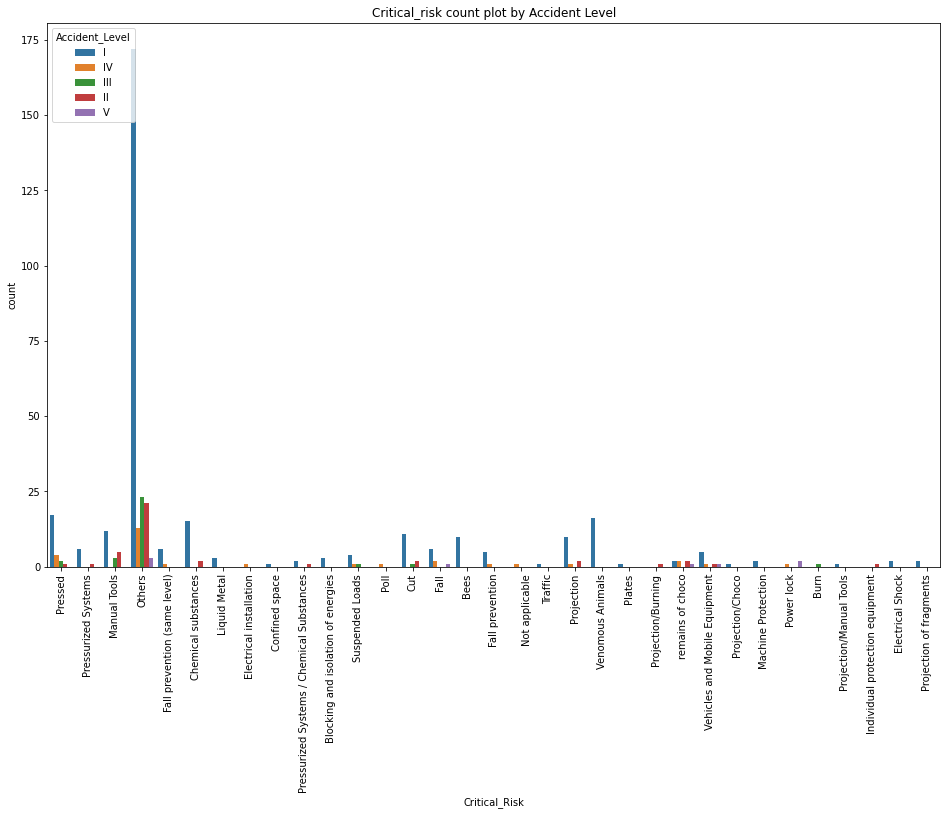

In [34]:
plt.figure(figsize = (16,10))
sns.countplot(x = 'Critical_Risk', data = data, orient = 'v',
                  hue = 'Accident_Level').set_title('Critical_Risk'.capitalize() +' count plot by Accident Level',fontsize=12)
plt.xticks(rotation = 90)
plt.show()

### Critical risk others with accident level I has more number of counts.

In [47]:
data['nSentences'] = data['Description'].apply(sent_tokenize).tolist()
data['nSentences'] = data['nSentences'].apply(len)
data['nSentences'].value_counts()

1    182
2    132
3     63
4     24
5     13
6      8
8      2
7      1
Name: nSentences, dtype: int64

### Most of the descriptions in the dataset has 1 and 2 line descriptions.
### Observed the number of words in the description and found most descriptions are containing words in the range 37 to 79

<AxesSubplot:>

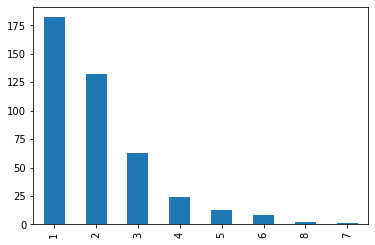

In [36]:
data['nSentences'].value_counts().plot(kind='bar')

In [49]:
count_words = lambda x: len(word_tokenize(x))
data['nWords'] =  data['Description'].apply(count_words)
data['nWords'].head()

0     84
1     59
2     62
3    110
4    100
Name: nWords, dtype: int64

In [50]:
data['nWords'].value_counts()

60     11
46     10
79     10
74      9
37      8
       ..
123     1
17      1
202     1
140     1
130     1
Name: nWords, Length: 123, dtype: int64

Text(0.5, 0, 'Row number')

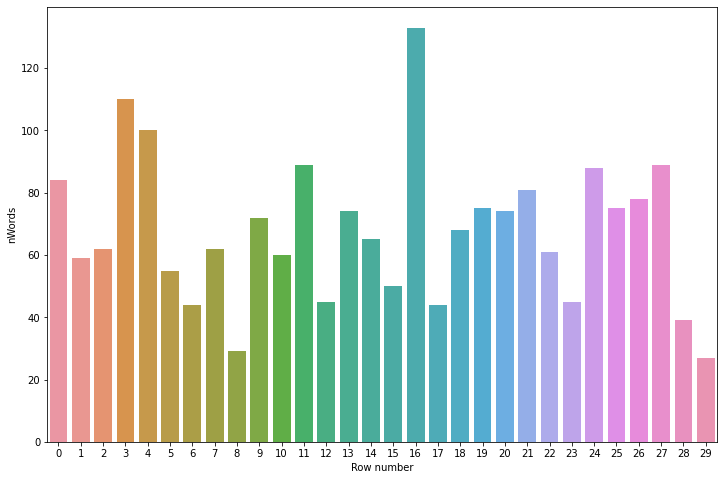

In [38]:
plt.figure(figsize = (12,8))
wordcounts = data['nWords'][0:30]
sns.barplot(x = wordcounts.index,  y=wordcounts)
plt.xlabel("Row number")

<AxesSubplot:>

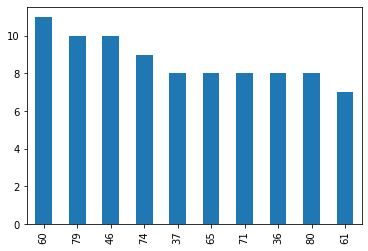

In [39]:
data['nWords'].value_counts().sort_values(ascending = False)[0:10].plot(kind='bar')

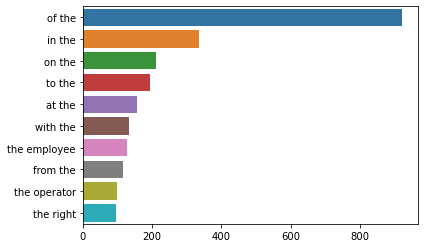

In [40]:

def top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

def ngram_barchart(text, n=None):
    lines = text.str.split()
    lines =lines.values.tolist()
    corpus=[word for word in lines]

    top_n_bigrams= top_ngrams(text,n)[:15]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
ngram_barchart(data['Description'],2)


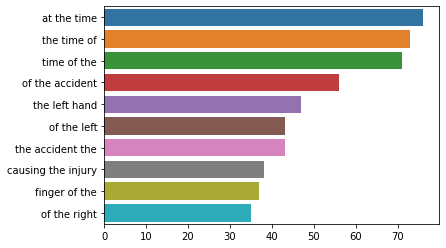

In [41]:
ngram_barchart(data['Description'],3)

In [42]:
from nltk.corpus import stopwords
def preprocess(text):
    corpus=[]
    lemmatizer = WordNetLemmatizer()
    for lines in text:
            words=word_tokenize(lines)
            words = [word for word in words if word not in stopwords.words('english')]
            words=[lemmatizer.lemmatize(w) for w in words if len(w)>2]
            corpus.append(words)
    return corpus
    

In [173]:
def plot_wordcloud(text):
    wordcloud = WordCloud(
        background_color='black',
        colormap = 'rainbow',
        #stopwords=set(STOPWORDS),
        max_words=250,
        min_font_size = 5,
        max_font_size=25, 
        scale=4,
        collocations=False,
        random_state=1)
    corpus = preprocess(text)
    wordcloud=wordcloud.generate(str(corpus))
    plt.figure(figsize=(18, 16))
    plt.axis('off') 
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.show()
   

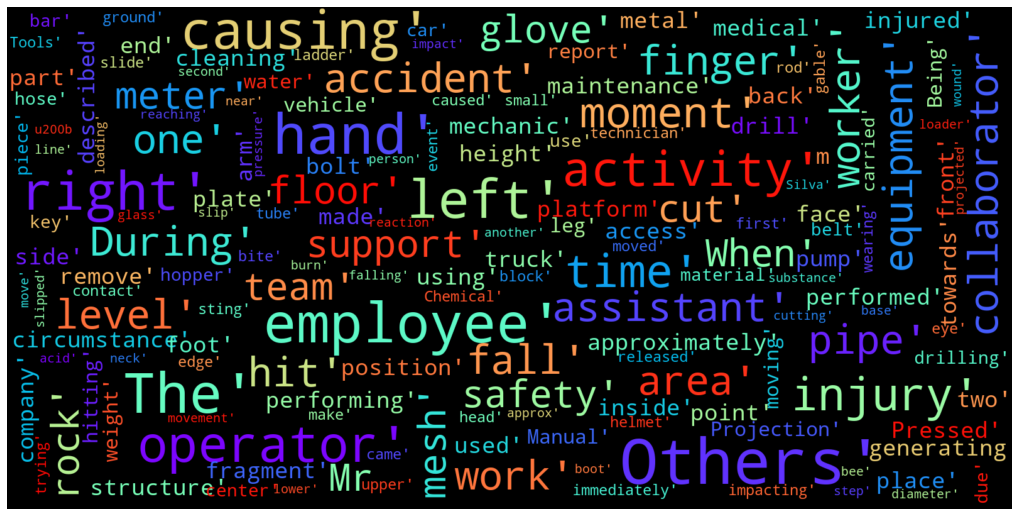

In [174]:
plot_wordcloud(data['Description'])

### Observations
#### Most of the words in the corpus
#### Body-parts: left, right, hand, finger, face, foot,head and glove
#### Person: employee, operator, collaborator, assistant, worker and mechanic
#### Movement: fall, hit, lift and slip
#### Equipment: equipment, pipe,pump, meter, drill, truck and tube
#### Accident: accident, activity, safety, injury, causing

### Regular expressions to extract numbers from description column

In [45]:
import re
def find_numbers(text):
    
    #numbers = re.findall(r'[0-9]+\.*\:*\-*', text)
    numbers = re.findall(r'\w*\d\.*\:*\-*[\w\d]+w*\.*\:*\-*', text)
    res = list((numbers))
  
    #print(str(res))
    return res
data['Numbers_in_description'] = data['Description'].apply(find_numbers)
data['Numbers_in_description'].head(20)


0                                [08]
1                                [48]
2                               [170]
3                   [9:45, 1880, 695]
4     [11:45, 3015, 27, 33, 70, 1.06]
5                                  []
6                                [09]
7                        [04:50, 100]
8                               [326]
9                           [70, 069]
10              [60x4x5cm, 1.2, 1.50]
11                      [60, 35, 200]
12                                 []
13            [544, 3300, 440V, 400A]
14                         [08FI0502]
15                                 []
16                        [050, 1620]
17                                 []
18                        [G2133, 75]
19                                 []
Name: Numbers_in_description, dtype: object

### Found numbers in the description. Most numbers are relevant and should not be removed.

### Data Preprocessing to be ready for ML models

## Remove unwanted columns from the dataframe

In [46]:
columns_to_drop = ['Date', 'Country', 'Local', 'Industry_sector', 'Potential_Accident_Level', 'Gender', 'Employee_Third_Party',
       'Year', 'Month', 'Day', 'Weekday','Season', 'isHoliday', 'nSentences', 'nWords']
data.drop(columns_to_drop, axis = 1,inplace = True)
data.head()

,Accident_Level,Critical_Risk,Description,Numbers_in_description
0,I,Pressed,While removing the drill rod of the Jumbo 08 f...,[08]
1,I,Pressurized Systems,During the activation of a sodium sulphide pum...,[48]
2,I,Manual Tools,In the sub-station MILPO located at level +170...,[170]
3,I,Others,Being 9:45 am. approximately in the Nv. 1880 C...,"[9:45, 1880, 695]"
4,IV,Others,Approximately at 11:45 a.m. in circumstances t...,"[11:45, 3015, 27, 33, 70, 1.06]"


### Join two columns Critical_Risk and Description

In [145]:
data['Description'] = data[['Critical_Risk','Description']].apply(lambda x: ' '.join(x), axis =1)

In [146]:
data['Description'].head()

0    Pressed While removing the drill rod of the Ju...
1    Pressurized Systems During the activation of a...
2    Manual Tools In the sub-station MILPO located ...
3    Others Being 9:45 am. approximately in the Nv....
4    Others Approximately at 11:45 a.m. in circumst...
Name: Description, dtype: object

In [147]:
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer
lemmatizer = WordNetLemmatizer()
ps=PorterStemmer()
lancaster = LancasterStemmer()

In [148]:
def preprocess_description(text):  
             
        sn = SnowballStemmer(language='english')        
        text = ''.join(re.findall(r'[a-zA-Z0-9 ]',text))        
        text = text.lower()
        text = text.strip()        
        words = word_tokenize(text)
        words = [sn.stem(word) for word in words if len(word)>2]
        text = ' '.join(words)        
        return text    

In [149]:
i = 0
data['clean_description'] = ""
for desc in data['Description']:
    data['clean_description'].iloc[i] = preprocess_description(data['Description'].iloc[i])    
    i = i+1
data['clean_description'].head()

0    press while remov the drill rod the jumbo for ...
1    pressur system dure the activ sodium sulphid p...
2    manual tool the substat milpo locat level 170 ...
3    other be 945 approxim the 1880 cx695 ob7 the p...
4    other approxim 1145 circumst that the mechan a...
Name: clean_description, dtype: object

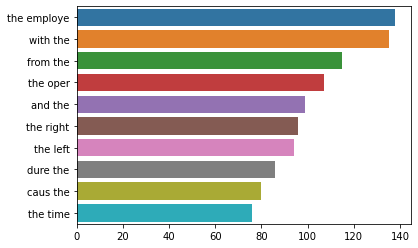

In [150]:
ngram_barchart(data['clean_description'],2)

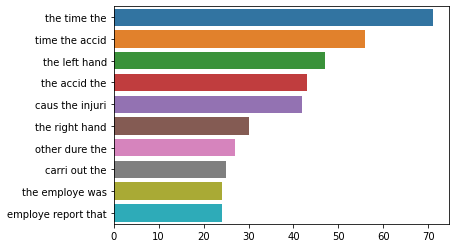

In [151]:
ngram_barchart(data['clean_description'],3)

In [152]:
data.head()

,Accident_Level,Critical_Risk,Description,Numbers_in_description,clean_description
0,I,Pressed,Pressed While removing the drill rod of the Ju...,[08],press while remov the drill rod the jumbo for ...
1,I,Pressurized Systems,Pressurized Systems During the activation of a...,[48],pressur system dure the activ sodium sulphid p...
2,I,Manual Tools,Manual Tools In the sub-station MILPO located ...,[170],manual tool the substat milpo locat level 170 ...
3,I,Others,Others Being 9:45 am. approximately in the Nv....,"[9:45, 1880, 695]",other be 945 approxim the 1880 cx695 ob7 the p...
4,IV,Others,Others Approximately at 11:45 a.m. in circumst...,"[11:45, 3015, 27, 33, 70, 1.06]",other approxim 1145 circumst that the mechan a...


In [155]:
new_data = data.drop(['Critical_Risk','Description','Numbers_in_description'], axis = 1)

In [156]:
new_data.head()

,Accident_Level,clean_description
0,I,press while remov the drill rod the jumbo for ...
1,I,pressur system dure the activ sodium sulphid p...
2,I,manual tool the substat milpo locat level 170 ...
3,I,other be 945 approxim the 1880 cx695 ob7 the p...
4,IV,other approxim 1145 circumst that the mechan a...


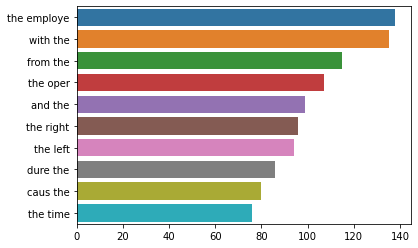

In [157]:
ngram_barchart(new_data['clean_description'],2)

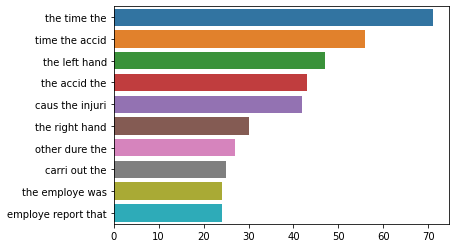

In [158]:
ngram_barchart(new_data['clean_description'],3)

In [160]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
new_data['Accident_Level'] = encoder.fit_transform(new_data['Accident_Level'])
new_data.head()

,Accident_Level,clean_description
0,0,press while remov the drill rod the jumbo for ...
1,0,pressur system dure the activ sodium sulphid p...
2,0,manual tool the substat milpo locat level 170 ...
3,0,other be 945 approxim the 1880 cx695 ob7 the p...
4,3,other approxim 1145 circumst that the mechan a...


In [162]:
new_data.to_csv("cleaned_industry_safety_data.csv")

### Applied preprocessing steps to clean text data.
### Only achracters A-Za-z0-9 and space is kept. Other characters are removed. 
### Snowball stemmer is used to get base words and text is then converted to lowercase.
### bi-gram and tri-grams are observed on the cleaned data.
### Cleaned data is stored in csv file.